In [1]:
from knowknow import *

In [2]:
dball = Dataset('infosci-wos-all')

loading variable infosci-wos-all/_attributes from disk
loading variable infosci-wos-all/groups from disk


In [3]:
db2 = Dataset('infosci-wos-filtered')

loading variable infosci-wos-filtered/_attributes from disk
loading variable infosci-wos-filtered/groups from disk
loading variable infosci-wos-filtered/group_reps from disk


In [4]:
db = Dataset('infosci-wos-filtered-grouped')

loading variable infosci-wos-filtered-grouped/_attributes from disk
loading variable infosci-wos-filtered-grouped/groups from disk
loading variable infosci-wos-filtered-grouped/group_reps from disk


In [5]:
db.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)
db2.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)
dball.set_attribute('RELIABLE_DATA_STARTS_HERE', 1900)

# more uncategorized analysis

In [6]:
sorted(dball.items('c'))[:10]

loading variable infosci-wos-all/ind ___ c from disk


['&, P.|solicitations 0707',
 "'T, H.|1971|nucl phys b,vb 35,p167",
 "'T, H.|1998|am j health-syst ph,v55,p594",
 "'T, H.|coping crises manage",
 '(Aka, S.|j chandr mem glob hi',
 '(Ala), A.|2009|ala counc min 2009 a,v47',
 '(Ala), A.|ala em lead progr',
 '(Ala), A.|stand lib org eq sec',
 '(Ascb), A.|san franc decl res a',
 '(Cnnic), C.|2012|29 stat rep int dev']

In [7]:
cc_full = dball.by('c').docs

loading variable infosci-wos-all/doc ___ c from disk


In [8]:
#cc = db.by('c').cits
cc = None

In [9]:
num1 = sum([1 for x,c in cc_full.items() if c == 1])
num2 = sum([1 for x,c in cc_full.items() if c in [2,3,4]])
num3 = sum([1 for x,c in cc_full.items() if c >= 5])

total = sum([1 for x,c in cc_full.items() if c >= 1])
total2 = sum(db2.by('fy').docs.values())
total3 = len(db2.items('fj'))
total4 = sum([c for x,c in cc_full.items() if c >= 1])

c1 = num1/total
c2 = num2/total
c3 = num3/total

loading variable infosci-wos-filtered/doc ___ fy from disk
loading variable infosci-wos-filtered/ind ___ fj from disk


In [10]:
total,total2,total3,total4

(1356326, 71987, 77, 2826689)

In [11]:
c4 = sum([c for x,c in cc_full.items() if c >= 5]) / sum(cc_full.values())

In [12]:
sum( db2.by('fj').cits.values() )

2629865

In [13]:
sum( db.by('fj').cits.values() )

loading variable infosci-wos-filtered-grouped/ind ___ fj from disk


1073017

In [14]:
first = min(yy for (yy,),c in db.by('fy').cits.items() if c>0)
last = max(yy for (yy,),c in db.by('fy').cits.items() if c>0)

loading variable infosci-wos-filtered-grouped/ind ___ fy from disk


In [15]:
display(Markdown(f"""

Within the {len(db.by('fj').cits)} library and information science journals which are indexed continuously by WoS (see Appendix B), 
    I have citations from {total2:,} articles published between {first} and {last}, 
    {total4 / 1e6:0.1f}M citations in all. 
Of the {total / 1e6:0.1f}M distinct cited works cited in these articles, 
    {c1:.0%} received only a single citation, 
    {c2:.0%} received between 2 and 4 citations, 
    and {c3:.0%} received at least 5 citations. 
However, {c4:.0%} of citations are to the 7% of cited works which receive at least 5 citations. 
Typographic errors, alternate spellings, smudges of ink, and quirks of the algorithm 
    will register as a totally separate cited work, 
    so this number of once-cited works is an overestimate. 
But if it is even remotely accurate, 
    it shows that the relatively uncited get about as much attention as the relatively cited. 
    
In the rest of this paper I focus only on cited works that received at least 5 citations total, 
    disregarding the totally ignored. 
"""))



Within the 77 library and information science journals which are indexed continuously by WoS (see Appendix B), 
    I have citations from 71,987 articles published between 1946 and 2022, 
    2.8M citations in all. 
Of the 1.4M distinct cited works cited in these articles, 
    76% received only a single citation, 
    18% received between 2 and 4 citations, 
    and 6% received at least 5 citations. 
However, 42% of citations are to the 7% of cited works which receive at least 5 citations. 
Typographic errors, alternate spellings, smudges of ink, and quirks of the algorithm 
    will register as a totally separate cited work, 
    so this number of once-cited works is an overestimate. 
But if it is even remotely accurate, 
    it shows that the relatively uncited get about as much attention as the relatively cited. 
    
In the rest of this paper I focus only on cited works that received at least 5 citations total, 
    disregarding the totally ignored. 


In [16]:
#display(Markdown("""
"""
Of the {total:,} distinct cited works cited in {total2:,} Sociology articles in the chosen {total3:,} sociology journals,
    {c1:.0%} ({num1:,}) received only a single citation,
    {c2:.0%} ({num2:,}) received between 2 and 4 citations,
    and {c3:.0%} ({num3:,}) received at least 5 citations.
{c4:.0%} of the citations are to the {c3:.0%} which receive at least 5 citations.
This is an underestimate, as typographic errors, alternate spellings, smudges of ink, and quirks of the algorithm 
    will register as a totally separate cited work.
But if it's even remotely accurate, it shows that the relatively *uncited* get about as much attention as the relatively *cited*.
In this section I focus on the *cited* (discarding any works with less than 5 citations total).
This discards errors and one-offs.
Typographical errors and nonstandard spellings are excluded unless these become relatively common in this context.
And we consider only the references which have any substantive life to speak of.
The following analysis is on the {num5:,} remaining cited works.
""";
#""".format(**locals())))

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


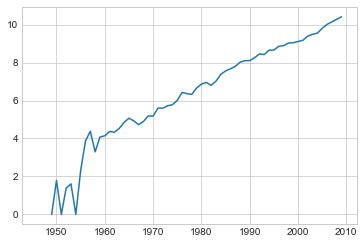

In [17]:
c = db.by('fy').cits
yrs = range(1900,2010,1)
plt.plot(yrs, np.log([c[(y,)] for y in yrs]));

loading variable infosci-wos-all/ind ___ fy from disk


c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


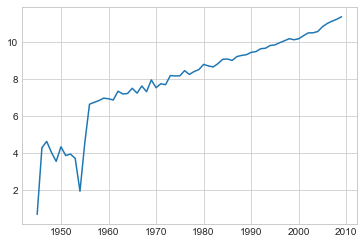

In [18]:
c = dball.by('fy').cits
yrs = range(1900,2010,1)
plt.plot(yrs, np.log([c[(y,)] for y in yrs]));

# summary before filtering

In [19]:
min_y = min(yy for (yy,),c in db.by('fy').cits.items() if c>0)
max_y = max(yy for (yy,),c in db.by('fy').cits.items() if c>0)

In [20]:
c1 = sum( dball.by('fy').docs.values() )
c2 = len( list(dball.by('fj').docs) )
c3 = len( list(db.by('fj').docs) )

Nclim = sum( c for (j,),c in dball.by('fj').cits.items() if j in set(db.items('fj')) )
Ndlim = sum( c for (j,),c in dball.by('fj').docs.items() if j in set(db.items('fj')) )

loading variable infosci-wos-all/doc ___ fy from disk
loading variable infosci-wos-all/doc ___ fj from disk
loading variable infosci-wos-filtered-grouped/doc ___ fj from disk
loading variable infosci-wos-all/ind ___ fj from disk


In [21]:
citN = sum( db.by('fj').cits.values() )
citN_m = citN / 1e6
docN = sum( db.by('fj').docs.values() )

njournals = len(db.items('fj'))

Web of Science provides a shortened version of each cited work, which attempts to generalize over reference formats, including references made in the body of the article or in footnotes, 
    as most were before broad citation format standardization in the late 1960s and early 1970s.
Their method of shortening has changed over time, and smudges of ink or typographical errors made by authors result in inconsistencies.
I use a grouping algorithm to identify identical references and combine them. See Appendix for details.

In [22]:
display(Markdown("""
(unused)
As of April 2020, there were {c1:,} journal articles indexed by Web of Science in the category "Sociology," distributed across {c2:,} journals.
I limit my focus here to the journals which consistently publish library and information science articles with references Web of Science is able to extract.
I also exclude journals which were founded after 1995 or which end before 2015.
This leaves {c3:,} journals, containing {Ndlim:,} articles published between {min_y} and {max_y}, and {Nclim:,} total citations.
""".format(**locals())))


(unused)
As of April 2020, there were 78,664 journal articles indexed by Web of Science in the category "Sociology," distributed across 88 journals.
I limit my focus here to the journals which consistently publish library and information science articles with references Web of Science is able to extract.
I also exclude journals which were founded after 1995 or which end before 2015.
This leaves 77 journals, containing 71,987 articles published between 1946 and 2022, and 2,629,865 total citations.


In [23]:
wauthAve = sum( db.by('fa').docs.values() ) / docN
cauthAve = sum( db.by('ta').docs.values() ) / docN
cworkAve = sum( db.by('c').docs.values() ) / docN

loading variable infosci-wos-filtered-grouped/doc ___ fa from disk
loading variable infosci-wos-filtered-grouped/doc ___ ta from disk
loading variable infosci-wos-filtered-grouped/doc ___ c from disk


In [24]:
cN = len(db.items('c'))
faN = len(db.items('fa'))
ffaN = len(db.items('ffa'))
taN = len(db.items('ta'))

loading variable infosci-wos-filtered-grouped/ind ___ c from disk
loading variable infosci-wos-filtered-grouped/ind ___ fa from disk
loading variable infosci-wos-filtered-grouped/ind ___ ffa from disk
loading variable infosci-wos-filtered-grouped/ind ___ ta from disk


In [25]:
display(Markdown("""
(unused) After filtering journals with incomplete or limited data, 
    grouping cited reference strings by their textual similarity, 
    and ignoring cited works which receive less than five citations total, 
    I was left with {docN:,} journal articles and {citN_m:0.1f}M citations. 
Across all articles, 
    there are on average {wauthAve:0.2f} writing authors, 
        {cauthAve:0.2f} cited authors, 
        and {cworkAve:0.2f} cited works. 
In total there were 
    {cN:,} cited works, 
    {taN:,} cited authors, and 
    {faN:,} writing authors 
    ({ffaN:,} first authors). 
""".format(**locals())))


(unused) After filtering journals with incomplete or limited data, 
    grouping cited reference strings by their textual similarity, 
    and ignoring cited works which receive less than five citations total, 
    I was left with 62,288 journal articles and 1.1M citations. 
Across all articles, 
    there are on average 2.62 writing authors, 
        15.10 cited authors, 
        and 17.09 cited works. 
In total there were 
    72,602 cited works, 
    30,463 cited authors, and 
    67,898 writing authors 
    (31,122 first authors). 


In [26]:
c = db.by('fj').cits
d = db.by('fj').docs
jmax = max(db.items('fj'), key=lambda x:c[(x,)]/d[(x,)])
jmin = min(db.items('fj'), key=lambda x:c[(x,)]/d[(x,)])

In [29]:
st_ave = db(fj=jmax).cits / db(fj=jmax).docs
soc_ave = db(fj=jmin).cits / db(fj=jmin).docs

In [30]:
top5 = sorted( db.items('fj'), key=lambda x: -db(fj=x).cits )[:5]

In [31]:
top5str = ["*{}* ({})".format(x.title(), db(fj=x).cits) for x in top5]
top5str = ", ".join(top5str[:-1]) + ", and " + top5str[-1]
top5prop = sum( db(fj=x).cits for x in top5 ) / sum( db(fj=x).cits for x in db.items('fj') )
top5propd = sum( db(fj=x).docs for x in top5 ) / sum( db(fj=x).docs for x in db.items('fj') )

In [34]:
display(Markdown(f"""
*{jmax.title()}* produces the most citations per article, at {st_ave:0.1f}. 
Meanwhile *{jmin.title()}* produces just {soc_ave:0.1f} citations per article. 
Web of Science provides the most citations for the journals {top5str}. 
Together these five journals comprise {top5prop:0.0%} of all citations ({top5propd:0.0%} of documents) in this dataset.
"""))


*Journal Of The Association For Information Systems* produces the most citations per article, at 49.1. 
Meanwhile *Scientist* produces just 1.3 citations per article. 
Web of Science provides the most citations for the journals *Scientometrics* (93773), *Information & Management* (56828), *International Journal Of Information Management* (47820), *Mis Quarterly* (46720), and *Journal Of Knowledge Management* (36688). 
Together these five journals comprise 26% of all citations (18% of documents) in this dataset.


In [28]:
st = sorted( db2.items('fj'), key=lambda x: -db(fj=x).docs )
#st = [x for x in st if x not in {'sociologia'}]
top_N = st[0]
top_Ny = db2(fj=top_N, fy=2020).docs
bot_N = st[-1]
bot_Ny = db2(fj=bot_N, fy=2020).docs

In [29]:
display(Markdown(f"*{top_N.title()}* published {top_Ny} papers in 2020, while *{bot_N.title()}* published just {bot_Ny}"))

*Scientometrics* published 385 papers in 2020, while *Journal Of The Australian Library And Information Association* published just 27

In [30]:
d50 = sum( db(fy=YY).docs for YY in range(1950,1960) )
c50 = sum( db(fy=YY).cits for YY in range(1950,1960) )
cd50 = c50/d50
j50 = len(set( fj for (fj,fy),c in db.by('fj','fy').cits.items() if c > 0 and fy in range(1950,1960) ))


d00 = sum( db(fy=YY).docs for YY in range(2000,2010) )
c00 = sum( db(fy=YY).cits for YY in range(2000,2010) )
cd00 = c00/d00
j00 = len(set( fj for (fj,fy),c in db.by('fj','fy').cits.items() if c > 0 and fy in range(2000,2010) ))

d2019 = db(fy=2019).docs

In [11]:
display(Markdown("""
(unused) Only {d50:,} articles were published in {j50:,} journals from 1950-1959 ({cd50:0.1f} citations per article),
    compared to {d00:,} articles in {j00:,} journals from 2000-2009 ({cd00:0.1f} citations per article).
In 2019 alone there were {d2019:,} articles published.
""".format(**locals())))


(unused) Only 116 articles were published in 6 journals from 1950-1959 (2.1 citations per article),
    compared to 13,410 articles in 67 journals from 2000-2009 (13.9 citations per article).
In 2019 alone there were 3,663 articles published.


# citing authors

In [12]:
fc = db.by('fa').docs

num1 = len(db.items('fa'))
num2 = len([_ for (a,),c in fc.items() if c == 1])
p2 = num2 / num1

an = sorted(fc.items(), key=lambda x:-x[1])
an = an[:10]
def transa(x):
    (x,),c = x
    x = x.split(", ")
    return (x[1]+". "+x[0]).title() + " (%s)"%c
an = [transa(x) for x in an]
an = ", ".join(an[:-1]) + " and " + an[-1]

loading variable infosci-wos-filtered-grouped/doc ___ fa from disk
loading variable infosci-wos-filtered-grouped/ind ___ fa from disk


In [13]:
len([y for y in fc.values() if y>20])

683

In [14]:
num3 = len([_ for (a,),c in fc.items() if c >20])
num4 = len([_ for (a,),c in fc.items() if c >40])

In [15]:
display(Markdown("""
Of the {num1:,} authors who published in this context, {num2:,} only published a single time ({p2:0.0%}).
{num3:,} authors have published more than 20 papers, and just {num4:,} published more than 40.
The top ten publishing first authors are {an}.
It is no accident that "Smith" shows up regularly in this list, a reminder that author names are not disambiguated.
""".format(**locals())))


Of the 67,898 authors who published in this context, 44,821 only published a single time (66%).
683 authors have published more than 20 papers, and just 199 published more than 40.
The top ten publishing first authors are Y. Chen (267), J. Lee (242), M. Thelwall (230), Y. Zhang (215), Y. Wang (213), J. Kim (211), Y. Liu (210), S. Kim (201), X. Li (193) and S. Lee (179).
It is no accident that "Smith" shows up regularly in this list, a reminder that author names are not disambiguated.


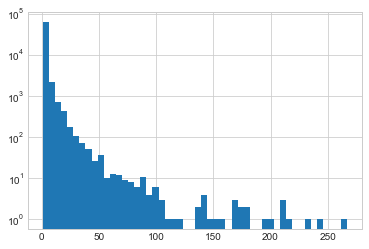

In [19]:
plt.hist(fc.values(), bins=50);
plt.yscale('log')

# cited authors

In [20]:
fc = db.by('ta').docs

num1 = len(db.items('ta'))
num2 = len([_ for (a,),c in fc.items() if c == 5])
p2 = num2 / num1

an = sorted(fc.items(), key=lambda x:-x[1])
an = an[:20]
def transa(x):
    (x,),c = x
    x = x.split(", ")
    return (x[1]+" "+x[0]).title() + " (%s citations)"%c
    #return (x[1]+" "+x[0]).title() + " ({:,} citations)".format(c)
an = [transa(x) for x in an]
an = ", ".join(an[:-1]) + " and " + an[-1]

loading variable infosci-wos-filtered-grouped/doc ___ ta from disk
loading variable infosci-wos-filtered-grouped/ind ___ ta from disk


In [21]:
num3 = len([_ for (a,),c in fc.items() if c >100])
p3 = num3/num1
num4 = len([_ for (a,),c in fc.items() if c >1000])
p4 = num4/num1

In [22]:
display(Markdown("""
I have already filtered cited works with less than five citations, so all {num1:,} cited authors in this dataset have at least five citations.
Of these, {num2:,} ({p2:0.0%}) were cited less than 10 times, {num3:,} ({p3:0.0%}) were cited at least 100 times and {num4} were cited at least 1000 times in this dataset.
The top authors cited in this dataset were {an}.
""".format(**locals())))


I have already filtered cited works with less than five citations, so all 30,463 cited authors in this dataset have at least five citations.
Of these, 4,660 (15%) were cited less than 10 times, 1,713 (6%) were cited at least 100 times and 40 were cited at least 1000 times in this dataset.
The top authors cited in this dataset were C. Fornell (2422 citations), J. Hair (2345 citations), V. Venkatesh (2204 citations), D. Van (2141 citations), F. Davis (2086 citations), E. Garfield (1861 citations), W. Orlikowski (1737 citations), P. Podsakoff (1728 citations), W. Chin (1721 citations), D. Gefen (1590 citations), T. Davenport (1551 citations), L. Leydesdorff (1542 citations), W. Glanzel (1537 citations), R. Yin (1461 citations), I. Nonaka (1457 citations), M. Porter (1433 citations), K. Eisenhardt (1433 citations), I. Ajzen (1415 citations), E. Rogers (1401 citations) and J. Nunnally (1356 citations).


# cited works

In [31]:
fc = db.by('c').docs

num1 = len(db.items('c'))
num2 = len([_ for (a,),c in fc.items() if c == 5])
p2 = num2 / num1

an = sorted(fc.items(), key=lambda x:-x[1])
an = an[:10]
def transa(x):
    (x,),c = x
    x = x.split("|")
    if len(x)==2:
        a,w = x
        #return ("%s (??)"%a).title() + " (%s citations)"%c
    elif len(x)==3:
        a,y,w = x
        #return ("%s (%s)"%(a,y)).title() + " (%s citations)"%c
    print (a, "-", w)
    a = a.split(",")[0]
    a = a.title()
    a = a+"'s"
    
    w = w.title()
    return ("%s *%s* (%s)"%(a,w,c))
    #return (x[1]+" "+x[0]).title() + " ({:,} citations)".format(c)
an = [transa(x) for x in an]
an = ", ".join(an[:-1]) + " and " + an[-1]

Fornell, C. - j marketing res,v18,p39
Davis, F. - mis quart,v13,p319
Podsakoff, P. - j appl psychol,v88,p879
Hair, J. - multivariate data an
Venkatesh, V. - mis quart,v27,p425
Glaser, B. - discovery grounded t
Rogers, E. - diffusion innovation
Yin, R. - case study res desig
Hirsch, J. - p natl acad sci usa,v102,p16569
Eisenhardt, K. - acad manage rev,v14,p532


In [32]:
num3 = len([_ for (a,),c in fc.items() if c >100])
p3 = num3/num1
num4 = len([_ for (a,),c in fc.items() if c >1000])
p4 = num4/num1

In [33]:
display(Markdown("""
All {num1:,} cited works in this dataset have at least five citations.
Of these, {num2:,} ({p2:0.0%}) were cited less than 10 times, {num3:,} ({p3:0.0%}) were cited at least 100 times and {num4} were cited at least 1000 times in this dataset.
The top cited works in this dataset were {an}.
""".format(**locals())))


All 72,602 cited works in this dataset have at least five citations.
Of these, 13,174 (18%) were cited less than 10 times, 815 (1%) were cited at least 100 times and 9 were cited at least 1000 times in this dataset.
The top cited works in this dataset were Fornell's *J Marketing Res,V18,P39* (2237), Davis's *Mis Quart,V13,P319* (1594), Podsakoff's *J Appl Psychol,V88,P879* (1362), Hair's *Multivariate Data An* (1297), Venkatesh's *Mis Quart,V27,P425* (1241), Glaser's *Discovery Grounded T* (1202), Rogers's *Diffusion Innovation* (1166), Yin's *Case Study Res Desig* (1085), Hirsch's *P Natl Acad Sci Usa,V102,P16569* (1084) and Eisenhardt's *Acad Manage Rev,V14,P532* (952).
